## Outline of Box-Muller Alogrithm
* Step 1: Generate $U_1$ and $U_2$ independently from Unif[0,1]
* Step 2: Work out two auxiliary variables $U$ and $V$ as follows:
\begin{equation}
\begin{split}
&R \longleftarrow 2\log(U_1)\\
&V \longleftarrow 2\pi U_2
\end{split}
\end{equation}
* Step 3: Work out two random varaibles following a standard normal distribution $N(0,1)$
\begin{equation}
\begin{split}
&Z_1 \longleftarrow \sqrt{R}\cos(V)\\
&Z_2 \longleftarrow \sqrt{R}\sin(V)
\end{split}
\end{equation}
* Step 4: Return $Z_1$ and $Z_2$


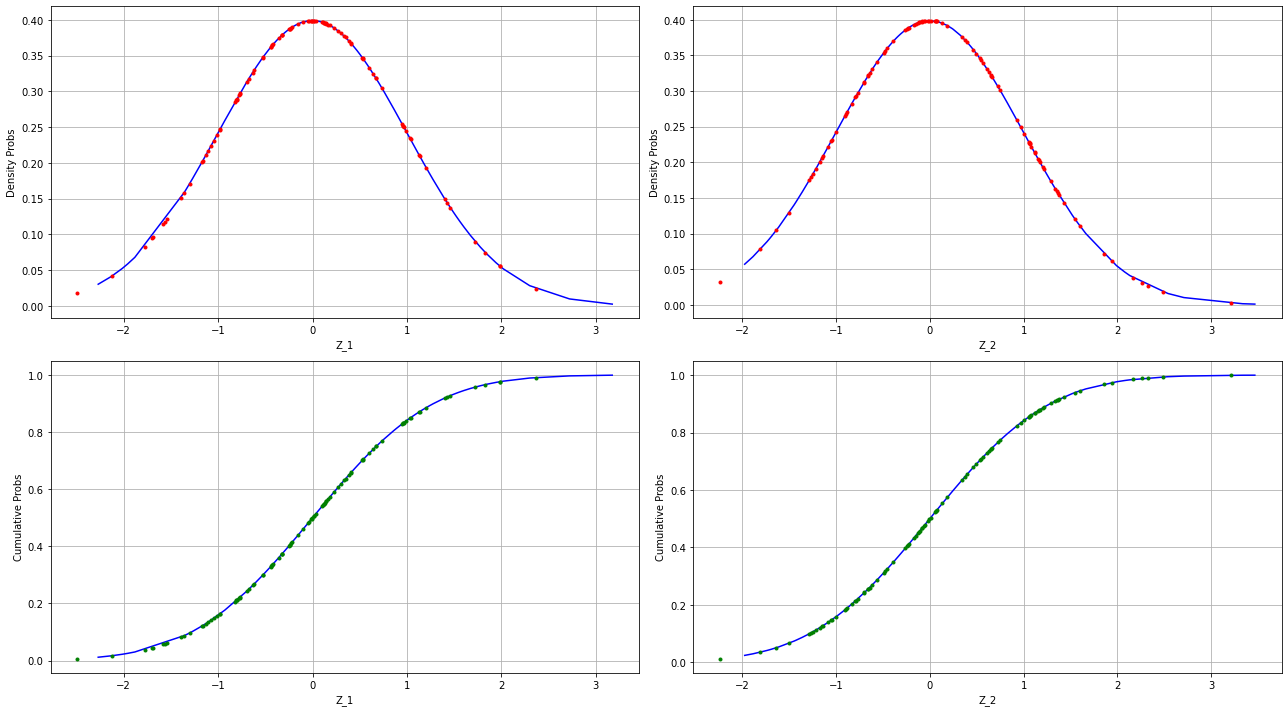

In [1]:
# Box-Muller algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(100)  # initilization x0 to generate same result for each run

# PART I
# generate a normal-distributed smaple pair (Z1, Z2)

u = np.random.rand(2)  # r.vs in [0,1]
#print(u)

R = -2*np.log(u[0])
#print(R)

V = 2*np.pi*u[1]
#print(V)

Z1 = np.sqrt(R)*np.cos(V)
Z2 = np.sqrt(R)*np.sin(V)
#print(Z1,Z2)  # a pair of [Z1, Z2] by Box-Muller algorithm
 
# PART II    
# generate a normal-distributed smaple pair vector of {Z1, Z2)} by using Box-Muller algorithm
num_row = 100
num_col = 2  # 100 x 2
U = np.random.rand(num_row,num_col) #generate 100x2 U in uniform distribution
#print(pd.DataFrame(U)) 

R_U = -2*np.log(U[:, 0])  # 1st col 
#print(R_U)

V_U = 2*np.pi*U[:,1]    # 2nd col
# print(V_U)

Z1_U = np.sqrt(R_U)*np.cos(V_U)
Z2_U = np.sqrt(R_U)*np.sin(V_U)
#print(pd.DataFrame(np.transpose([Z1_U, Z2_U])))

# calculate stats
Z1_U_sort = np.sort(Z1_U)    # sort in accending order
Z2_U_sort = np.sort(Z2_U)

Z1_U_pdf = norm.pdf(Z1_U_sort)  # densifty
Z2_U_pdf = norm.pdf(Z2_U_sort) 

Z1_U_cdf = norm.cdf(Z1_U_sort)  # cumulative
Z2_U_cdf = norm.cdf(Z2_U_sort) 

# Sampling from the standard norm via inverse function
Z_normal = np.random.normal(0, 1, [num_row, num_col])
Z1_normal_sort = np.sort(Z_normal[:,0])   
Z2_normal_sort = np.sort(Z_normal[:,1])

Z1_normal_pdf = norm.pdf(Z1_normal_sort)    
Z2_normal_pdf = norm.pdf(Z2_normal_sort) 

Z1_normal_cdf = norm.cdf(Z1_normal_sort)  
Z2_normal_cdf = norm.cdf(Z2_normal_sort)

#plot
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
# #plt.xticks(arange(len(stocks_df)),stocks_df)
plt.plot(Z1_normal_sort, Z1_normal_pdf, 'b')
plt.plot(Z1_U_sort, Z1_U_pdf, 'r.')
plt.grid(True)
plt.xlabel('Z_1')
plt.ylabel('Density Probs')
    
plt.subplot(2,2,2)
plt.plot(Z2_normal_sort, Z2_normal_pdf, 'b')
plt.plot(Z2_U_sort, Z2_U_pdf, 'r.')
plt.grid(True)
plt.xlabel('Z_2')
plt.ylabel('Density Probs')

plt.subplot(2,2,3)
plt.plot(Z1_normal_sort, Z1_normal_cdf, 'b')
plt.plot(Z1_U_sort, Z1_U_cdf,'g.')
plt.grid(True)
plt.xlabel('Z_1')
plt.ylabel('Cumulative Probs')

plt.subplot(2,2,4)
plt.plot(Z2_normal_sort, Z2_normal_cdf, 'b')
plt.plot(Z2_U_sort, Z2_U_cdf, 'g.')
plt.grid(True)
plt.xlabel('Z_2')
plt.ylabel('Cumulative Probs')
    
plt.tight_layout()
plt.show()



# Outline of Standard Monte Carlo Simulation Algorithm
## I: Simulation of Stock Prices
* Step 1: Consider the process
\begin{equation}
\frac{dS_t}{S_t} = r\times dt + \sigma\times dW_t
\end{equation}
 Its logform can be worked out as follows:
\begin{equation}
d\ln S_t = (r-\frac{1}{2}\sigma^2)\times dt + \sigma\times dW_t
\end{equation}
* Step 2: Based on this log process, we can work out the discretization version over $[0,T]$ by applying a Euler schema:
\begin{equation}
\ln S_{t+\triangle}- \ln S_t = (r-\frac{1}{2}\sigma^2)\times \triangle+ \sigma\times \sqrt{\triangle}\times Z_{t}
\end{equation}
where $t= t_0,\cdots, t_N$, $\triangle=T/N$ and $Z_t \sim N(0,1)$. This may generate an $(N+1)\times M$ matrix, where ''$+1$''means the inclusion of the initial price at time zero:
\begin{equation}
\left(%
\begin{array}{cccc}
  \ln S^1_0 & \ln S^2_0 & \cdots & \ln S^M_0 \\
  \ln S^1_1 & \ln S^2_1 & \cdots & \ln S^M_1 \\
  \vdots & \vdots & \vdots & \vdots \\
  \ln S^1_N & \ln S^2_N & \cdots & \ln S^M_N \\
\end{array}%
\right)
\end{equation}
Note that $M$ denotes the number of simulation paths, and $N$ presents the number of time steps (from now on).
* Step 3: Collect stock prices $S_T$ at $t_N=T$ over all paths:
\begin{equation}
\{S^1_{t_N},S^2_{t_N},\cdots, S^M_{t_N}\}
\end{equation}

## II: MC Price for Call Options
* Step 4: Work out all payoffs to options with strike $K$ and maturity $T$:
\begin{equation}
\{[S^1_T-K]^+,[S^2_T-K]^+,\cdots, [S^M_T-K]^+\},
\end{equation}
where $[x]^+$ indicate the function $\max(x,0)$.
* Step 5: Work out the MC options by taking the average of the terminal payoffs across all paths:
\begin{equation}
C_0(K,t_N) = e^{-r(t_N-t_0)}\frac{1}{M}\sum^M_{j=1}[S^j(t_N)-K]^+
\end{equation}

# Applications to Two Probs
* Prob($S_T>K$) = $-e^{rT}\frac{\partial C(K)}{\partial K}$
* Prob($S_T=K$) = $e^{rT}\frac{\partial^2 C(K)}{\partial K^2}$

## Finite Difference Methods (FDM)
* Explicit (Forward) Finite Difference for the first-order derivative
\begin{equation}
\frac{\partial C(K)}{\partial K} = \frac{C(K+dK)-C(K)}{dK}
\end{equation}
* Central Finite Difference for the second-order derivative
\begin{equation}
\frac{\partial^2 C(K)}{\partial K^2} = \frac{C(K+dK)-2C(K)+C(K-dK)}{dK^2}
\end{equation}
  


In [ ]:
# Tasks:
# Setup
#           dS/S = r*dt + sigma*dW
#           dB/B = r*dt

# 1) Simulating S
# 2) Pricing European options
# 3) Estimating cumulative/density probability functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def Black_ScholesPrice(parameters):

    S0 = parameters['model']['S0']
    sigma = parameters['model']['sigma']
    K = parameters['asset']['K'] 
    rf = parameters['model']['rf']
    T = parameters['setup']['T']    
    option_type = parameters['asset']['optype'] 
    
    DF = np.exp(-rf*T)
    
    d1 = (np.log(S0/K)+(rf+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 1:  # call
        option_price = S0 * norm.cdf(d1) - K * DF * norm.cdf(d2)
    elif option_type == -1: # put
        option_price = K * DF * norm.cdf(-d2) - S0 * norm.cdf(-d1) 
    
    return option_price

def EulerMilsteinMCStock(scheme, parameters):
    np.random.seed(1000) # always put this line at the beginning of the function if sampling is needed.

    # time setup
    T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    S_0 = parameters['model']['S0']  # initial value
    sigma = parameters['model']['sigma']  # initial value
    rf = parameters['model']['rf']  # initial value    

    # simulation    
    S = np.zeros((numSteps + 1, numPaths),dtype=float)
    S[0,:] = np.log(S_0)
  
    ################         simluations for asset price S              ########
    for i in range(numPaths):  # 0<= i <= numPaths-1
        for t_step in range(1, numSteps+1): # 1<= t <= numSteps
            # the random number following a standard normal distribution with mean 0 and varaince 1 is sampled
            Zs = np.random.normal(0, 1, 1)                        
            
            if scheme == 'Euler':
                S[t_step,i] = S[t_step-1,i] + (rf-sigma**2/2)*dt + sigma*np.sqrt(dt)*Zs 
            elif scheme == 'Milstein':    
                # Euler and Milstein have the same discretization scheme for Log(S) due to dsigma(t,X)/dX =0
                # dlns = (r-sigma^2/2)dt + sigma*dW
                S[t_step,i] = S[t_step-1,i] + (rf-sigma**2/2)*dt + sigma*np.sqrt(dt)*Zs                                
            
    return np.exp(S)

def MC_option_price(S_T, parameters):

    # model parameters and optoin info
    S0 = parameters['model']['S0']
    sigma = parameters['model']['sigma']
    K = parameters['asset']['K'] 
    rf = parameters['model']['rf']
    T = parameters['setup']['T']    
    option_type = parameters['asset']['optype'] 
    
    DF = np.exp(-rf*T)  
    
    numPaths = parameters['setup']['numPaths']
    
    payoffs = np.maximum(0, (S_T- K) if option_type == 1 else (K-S_T))
    
    MC_optionprice = DF*(np.sum(payoffs)/numPaths)
    
    return MC_optionprice

def ProbHigherThanK(K_set, MC_price_Ks, parameters):
    
    rf = parameters['model']['rf']
    Factor = np.exp(rf*T)  # note there is no "-"
    
    num_K = len(K_set)
    cum_probs = np.zeros(num_K)
    
    for i in range(num_K-1):  # 0<= i <= (num_K-1）-1   note that the range of i
        
        dK = K_set[i] - K_set[i+1]  # >0      # K in descending order   
        price_k_plus_1 = MC_price_Ks[i] # C(K+dK)
        price_k = MC_price_Ks[i+1]      # C(K)
        
        cum_probs[i+1] = (price_k_plus_1 - price_k)/dK  # prob at K
    
    cum_probs = -cum_probs * Factor
    
    return cum_probs   

def Density_prob(K_set, MC_price_Ks, parameters):
    
    rf = parameters['model']['rf']
    Factor = np.exp(rf*T)  # note there is no "-"
    
    num_K = len(K_set)
    den_probs = np.zeros(num_K)
    
    for i in range(1,num_K-1):  # note that the range of i
        
        dK = K_set[i-1] - K_set[i]        # K in descending order   
        
        price_k_plus_1 = MC_price_Ks[i-1] # C(K+dK)
        price_k = MC_price_Ks[i]          # C(K)  
        price_k_minus_1 = MC_price_Ks[i+1]# C(K-dK)
        
        den_probs[i] = (price_k_plus_1 - 2*price_k + price_k_minus_1)/(dK**2)
    
    den_probs = den_probs * Factor
    
    return den_probs   
    

if __name__=="__main__": # main function
    
    S0 = 100
    sigma = 0.20
    K = 100
    rf = 0.05    
    T = 1     # maturity
    
    # discrete setup
    N = 100  # steps
    dt = T/N
    M = 200
    
    Optype = 1 # 1: call -1: put 

    parameters = {'model':{'S0':S0, 'sigma':sigma, 'rf':rf},                 
                  'asset':{'K':K, 'optype': Optype},
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    # Task 1
    # simulate stock prices
    Sim_S = EulerMilsteinMCStock('Euler', parameters)
    #print(pd.DataFrame(Sim_S))  # check    
    #print(Sim_S[-1,:])
    
    # plot simulated stock prices
    plt.figure(figsize=(12, 4))
    plt.plot(Sim_S)
    plt.ylabel('Simulated stock price paths')
    plt.xlabel('time step')    
    plt.tight_layout()
    plt.show()
    
    # Task 2
    # compare the Black-Schole price and MC price
    S_T = Sim_S[-1,:]
    MC_price = MC_option_price(S_T, parameters)
    BS_price = Black_ScholesPrice(parameters)
    print(MC_price, BS_price)
    
    # Task 3
    #estimate cumulative/density function    
    K_set = np.arange(150,50,-0.5, float)#generate the strike price
    num_K = len(K_set)
    MC_price_Ks = np.zeros(num_K)
    for i in range(num_K):
        parameters['asset']['K'] = K_set[i]        
        MC_price_Ks[i] = MC_option_price(S_T, parameters)
    
    # convert <K_set, MC_price_Ks> into dataframe
    MC_K_vs_price = pd.DataFrame(np.transpose([K_set,MC_price_Ks]), 
                                 index =list(range(0, num_K)), 
                                 columns=['K', 'Price']) 
    print(MC_K_vs_price)
    
    # estimate culumative probs
    HigherThanK_prob = ProbHigherThanK(K_set, MC_price_Ks, parameters)
    
    # estimate density probs
    den_probs = Density_prob(K_set, MC_price_Ks, parameters)
    
    # save all data
    All_info = pd.DataFrame(np.transpose([K_set,MC_price_Ks, HigherThanK_prob, den_probs]), 
                                 index =list(range(0, num_K)), 
                                 columns=['K', 'Price', 'Prob(ST>K)', 'Prob(ST=K)']) 
    print(All_info) 
    All_info.to_excel(r"all_MC_info.xlsx")
    
    # plot
    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.plot(K_set, den_probs, 'b')
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Prob(ST=K)')

    plt.subplot(1,3,2)
    plt.plot(K_set, HigherThanK_prob, 'b')
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Prob(ST>K)')
    
    plt.subplot(1,3,3)
    plt.plot(K_set, 1-HigherThanK_prob, 'b')
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Prob(ST<K)')


In [113]:
# this section is used to test code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

K_set = np.arange(50,150,1, int)
print(len(K_set))



100
